In [30]:
import pandas as pd
import numpy as np

weather = pd.read_csv("weather.csv", index_col="DATE")

Clean the data

In [31]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [32]:
valid_columns = weather.columns[null_pct < 0.05]

In [33]:
valid_columns

Index(['Unnamed: 0', 'STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN'],
      dtype='object')

In [34]:
weather = weather[valid_columns].copy()

In [35]:
weather

,Unnamed: 0,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,,
1970-01-01,0,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,1,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,2,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,3,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,4,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...,...
2022-11-13,38623,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,38624,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,38625,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [36]:
weather.columns = weather.columns.str.lower()

In [37]:
weather

,unnamed: 0,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,,
1970-01-01,0,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,1,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,2,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,3,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,4,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...,...
2022-11-13,38623,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,38624,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,38625,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [39]:
weather.index = pd.to_datetime(weather.index)

Split the data

In [44]:
weather["station"].unique()

array(['USW00014732', 'USW00094789'], dtype=object)

In [49]:
weather = weather.drop(columns="unnamed: 0").copy()

In [50]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21


In [51]:
lga = weather[weather["station"] == "USW00014732"].copy() 

In [52]:
lga

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43
2022-11-14,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38
2022-11-15,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36


In [53]:
weather = weather[weather["station"] == "USW00094789"]

In [54]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [55]:
weather = weather.merge(lga, left_index=True, right_index=True)

In [56]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y
DATE,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36


In [57]:
weather["y"] = weather.shift(-1)["tmax_x"]

In [58]:
weather = weather.ffill()

In [59]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y,y
DATE,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43,47.0
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38,46.0
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36,53.0


In [60]:
weather["ds"] = weather.index

In [74]:
predictors = weather.columns[~weather.columns.isin(["y", "name_x", "station_x", 'station_y', 'name_y', "ds"])]

In [75]:
predictors

Index(['prcp_x', 'snow_x', 'snwd_x', 'tmax_x', 'tmin_x', 'prcp_y', 'snow_y',
       'snwd_y', 'tmax_y', 'tmin_y'],
      dtype='object')

In [76]:
train = weather[:"2021-12-31"]
test = weather["2021-12-31":]

In [77]:
train[predictors]

,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,prcp_y,snow_y,snwd_y,tmax_y,tmin_y
DATE,,,,,,,,,,
1970-01-01,0.00,0.0,0.0,28,22,0.00,0.0,0.0,28,21
1970-01-02,0.00,0.0,0.0,31,22,0.00,0.0,0.0,29,19
1970-01-03,0.02,0.0,0.0,38,25,0.05,0.4,0.0,35,26
1970-01-04,0.00,0.0,0.0,31,23,0.00,0.0,0.0,30,22
1970-01-05,0.00,0.0,0.0,35,21,0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.03,0.0,0.0,39,32,0.08,0.0,0.0,41,35
2021-12-28,0.06,0.0,0.0,47,37,0.05,0.0,0.0,48,37
2021-12-29,0.35,0.0,0.0,45,41,0.16,0.0,0.0,44,42


In [78]:
from prophet import Prophet

def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m

m = fit_prophet(train)

19:46:32 - cmdstanpy - INFO - Chain [1] start processing
19:46:50 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
predictions = m.predict(test)

In [80]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-31,61.451789,43.999563,59.188587,61.451789,61.451789,-10.169568,-10.169568,-10.169568,-2.404798,...,0.024395,0.024395,0.024395,-7.789165,-7.789165,-7.789165,0.0,0.0,0.0,51.282221
1,2022-01-01,61.451564,43.886827,59.202343,61.451564,61.451564,-9.472289,-9.472289,-9.472289,-1.623890,...,-0.016400,-0.016400,-0.016400,-7.831998,-7.831998,-7.831998,0.0,0.0,0.0,51.979276
2,2022-01-02,61.451340,42.116448,57.649385,61.451340,61.451340,-11.882048,-11.882048,-11.882048,-4.101609,...,0.092322,0.092322,0.092322,-7.872761,-7.872761,-7.872761,0.0,0.0,0.0,49.569291
3,2022-01-03,61.451115,31.364110,46.682840,61.451115,61.451115,-22.892606,-22.892606,-22.892606,-15.309001,...,0.327882,0.327882,0.327882,-7.911487,-7.911487,-7.911487,0.0,0.0,0.0,38.558509
4,2022-01-04,61.450890,28.427615,43.545997,61.450890,61.450890,-25.299019,-25.299019,-25.299019,-17.258012,...,-0.092811,-0.092811,-0.092811,-7.948196,-7.948196,-7.948196,0.0,0.0,0.0,36.151871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2022-11-13,61.380525,49.347577,64.660125,61.367973,61.399994,-5.038643,-5.038643,-5.038643,-2.145620,...,0.092322,0.092322,0.092322,-2.985346,-2.985346,-2.985346,0.0,0.0,0.0,56.341881
318,2022-11-14,61.380300,42.208602,58.002787,61.367666,61.399883,-11.143413,-11.143413,-11.143413,-8.348148,...,0.327882,0.327882,0.327882,-3.123147,-3.123147,-3.123147,0.0,0.0,0.0,50.236887
319,2022-11-15,61.380075,41.673370,57.070003,61.367350,61.399771,-12.079177,-12.079177,-12.079177,-8.726067,...,-0.092811,-0.092811,-0.092811,-3.260299,-3.260299,-3.260299,0.0,0.0,0.0,49.300898
320,2022-11-16,61.379851,43.128004,58.411363,61.366809,61.399750,-10.704830,-10.704830,-10.704830,-7.045962,...,-0.262147,-0.262147,-0.262147,-3.396721,-3.396721,-3.396721,0.0,0.0,0.0,50.675021


In [84]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

In [85]:
plot_components_plotly(m, predictions)

In [86]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,prcp_x,additive,0.118130,-0.195667,-0.195667,-0.195667
1,snow_x,additive,0.064540,-0.011915,-0.011915,-0.011915
2,snwd_x,additive,0.209635,0.063296,0.063296,0.063296
3,tmax_x,additive,61.758648,0.012399,0.012399,0.012399
4,tmin_x,additive,47.494024,-0.083919,-0.083919,-0.083919
5,prcp_y,additive,0.123378,-0.321682,-0.321682,-0.321682
6,snow_y,additive,0.071347,-0.491140,-0.491140,-0.491140
7,snwd_y,additive,0.217759,-0.201450,-0.201450,-0.201450
8,tmax_y,additive,62.609277,0.281497,0.281497,0.281497
9,tmin_y,additive,48.923130,0.427295,0.427295,0.427295


In [88]:
predictions.index = test.index
predictions["actual"] = test["y"]

In [90]:
def mse(predictions, actual_label="actual", pred_label="yhat"):
    se = ((predictions[actual_label] - predictions[pred_label]) ** 2)
    print(se.mean())

mse(predictions)

40.53817427060952


In [91]:
from prophet.diagnostics import cross_validation

m = fit_prophet(weather)
cv = cross_validation(m, initial=f'{365*5} days', period='180 days', horizon='180 days', parallel="processes")

20:07:05 - cmdstanpy - INFO - Chain [1] start processing
20:07:24 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
mse(cv, actual_label="y")

36.17930502462588


<AxesSubplot:>

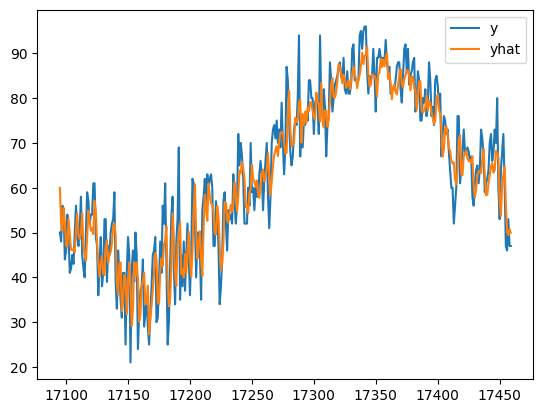

In [95]:
cv[["y", "yhat"]][-365:].plot()

In [98]:
n = fit_prophet(weather)
df = n.predict(weather.iloc[-1:])

20:19:13 - cmdstanpy - INFO - Chain [1] start processing
20:19:25 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
df[["ds", "yhat"]]

,ds,yhat
0,2022-11-17,50.124602


In [101]:
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)

20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:50 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
forecast = m.predict(future)

In [107]:
forecast["celsius"] = (forecast["yhat"] - 32) * (5/9)

In [111]:
df = forecast[["ds", "celsius"]]

In [116]:
df.index = df.ds

In [120]:
forecast.index = forecast.ds

In [122]:
forecast["2023-02-01":"2023-02-07"]["yhat"]

ds
2023-02-01    40.055942
2023-02-02    40.246928
2023-02-03    40.385414
2023-02-04    40.448943
2023-02-05    40.691518
2023-02-06    41.179546
2023-02-07    41.159557
Name: yhat, dtype: float64